# Assignment 2: Ensemble Methods and Calibration


## Instructions

Please push the .ipynb, .py, and .pdf to Github Classroom prior to the deadline. Please include your UNI as well.

**Make sure to use the dataset that we provide in CourseWorks/Classroom.**

**There are a lot of applied questions based on the code results. Please make sure to answer them all. These are primarily to test your understanding of the results your code generate (similar to any Data Science/ML case study interviews).**


## Name: Triyasha Ghosh Dastidar
## UNI: tg2936


## Dataset Description: Bank Marketing Dataset

This dataset contains information about direct marketing campaigns (phone calls) of a banking institution. The goal is to predict whether the client will subscribe to a term deposit. The details of the features and target are listed below:

**Features**:
- `age`: Age of the client
- `job`: Type of job
- `marital`: Marital status
- `education`: Education level
- `default`: Has credit in default?
- `balance`: Average yearly balance
- `housing`: Has housing loan?
- `loan`: Has personal loan?
- `contact`: Contact communication type
- `day`: Last contact day of the month
- `month`: Last contact month of year
- `duration`: Last contact duration in seconds
- `campaign`: Number of contacts performed during this campaign
- `pdays`: Number of days since the client was last contacted from a previous campaign
- `previous`: Number of contacts performed before this campaign
- `poutcome`: Outcome of the previous marketing campaign
- `deposit`: Has the client subscribed to a term deposit? (target)

**Objective**: The target variable (`deposit`) is binary (yes/no), and the goal is to predict whether a client will subscribe to a term deposit based on the given features.



In [4]:
## Use this cell to import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd


## Question 1: Decision Trees


**1.1: Load the Bank Marketing Dataset and inspect its structure.**
- Hint: Inspect columns and types.


In [5]:
df= pd.read_csv("bank.csv")
X = df.drop(columns=['deposit'])
y = df['deposit']
numerical_features = [] 
categorical_features = []
for col in X.columns:
    print(f"Column: {col}, Type: {X[col].dtype}")
    if X[col].dtype == "int64":
        numerical_features.append(col)
    elif X[col].dtype == "object":
        categorical_features.append(col)

Column: age, Type: int64
Column: job, Type: object
Column: marital, Type: object
Column: education, Type: object
Column: default, Type: object
Column: balance, Type: int64
Column: housing, Type: object
Column: loan, Type: object
Column: contact, Type: object
Column: day, Type: int64
Column: month, Type: object
Column: duration, Type: int64
Column: campaign, Type: int64
Column: pdays, Type: int64
Column: previous, Type: int64
Column: poutcome, Type: object


In [6]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [7]:
print(f"Numerical Features: {numerical_features}, count : {len(numerical_features)}")

Numerical Features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], count : 7


In [8]:
print(f"Categorical Features: {categorical_features}, count : {len(categorical_features)}")

Categorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], count : 9



**1.2: Are there any missing values in the dataset? If yes, how do you plan to handle them?**


In [9]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values>0]
missing_values

Series([], dtype: int64)

**According to the value seen above, there are no missing values.**


**1.3: Plot side-by-side bars of class distribution for each categorical feature in the dataset with respect to the target variable (e.g., `job`, `marital`, `education`, etc.).**


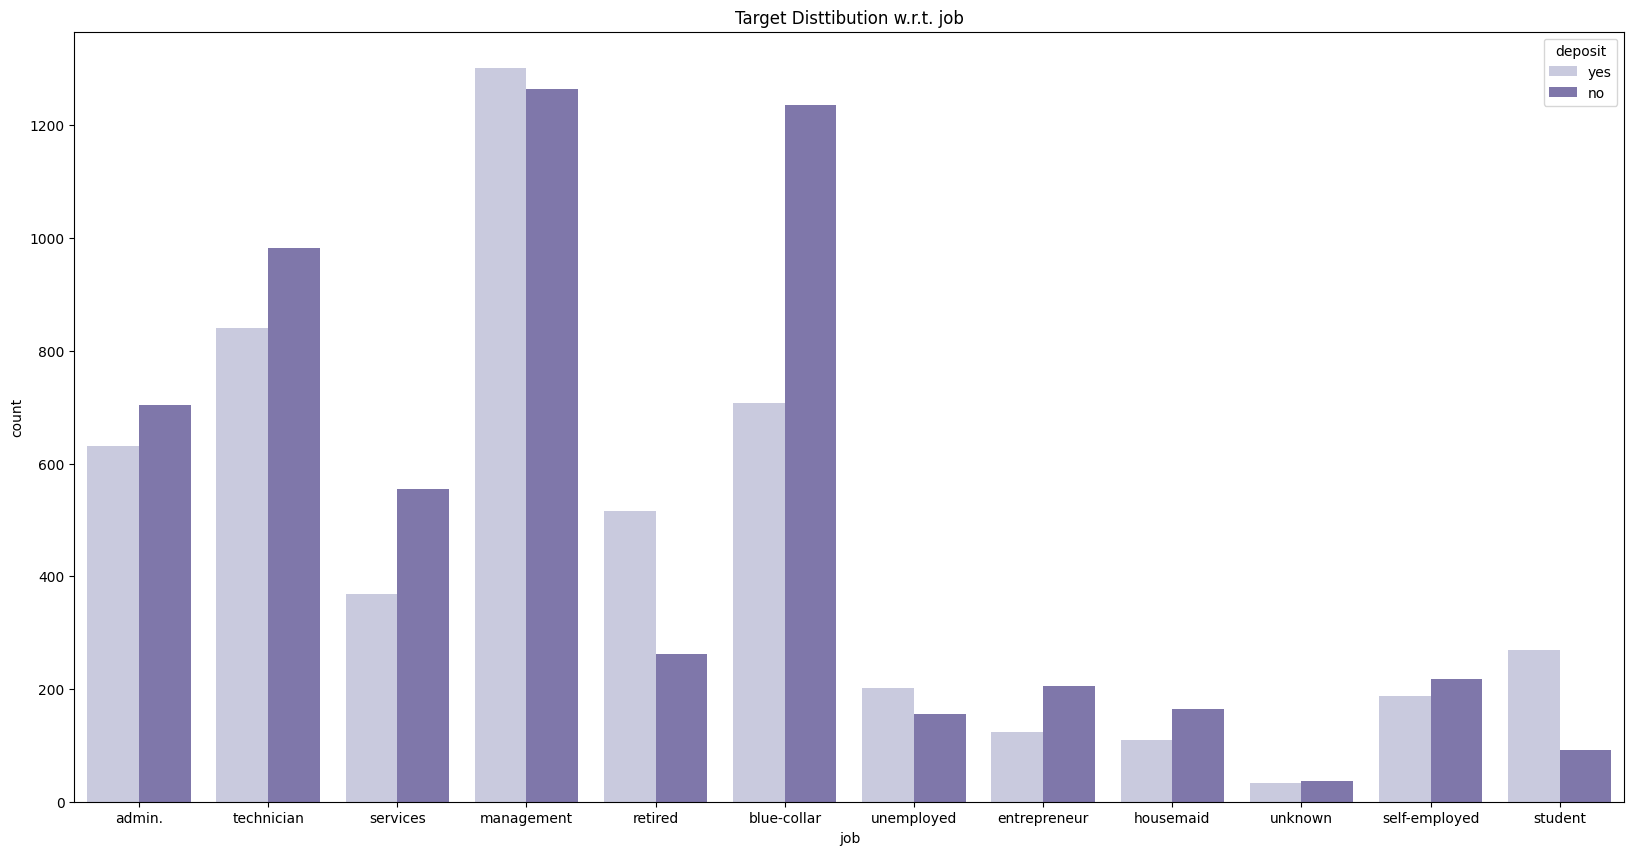

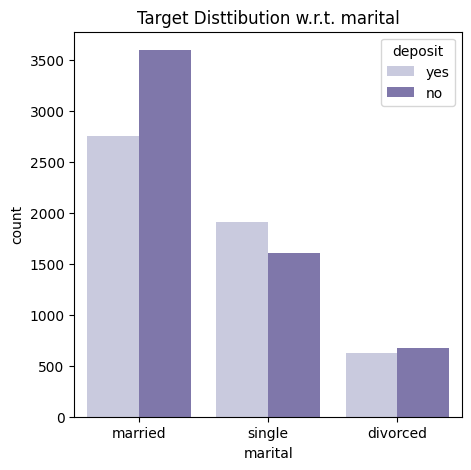

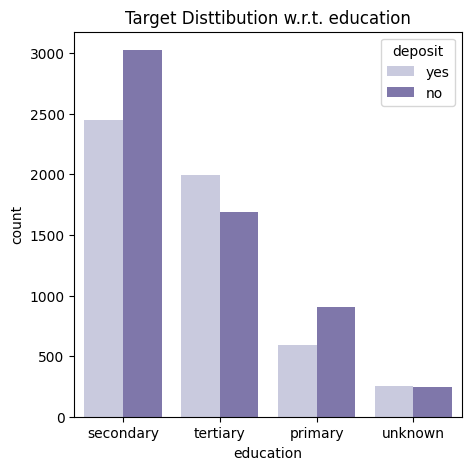

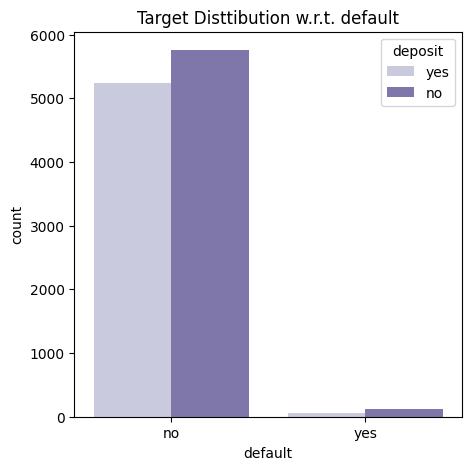

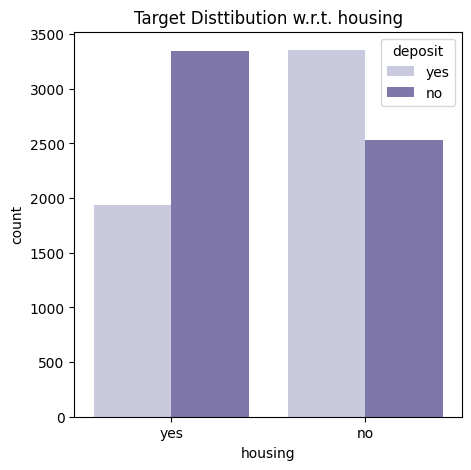

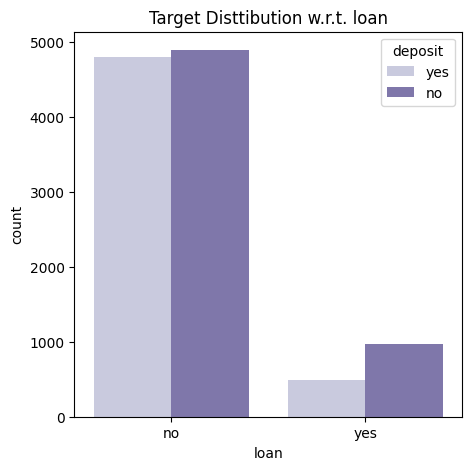

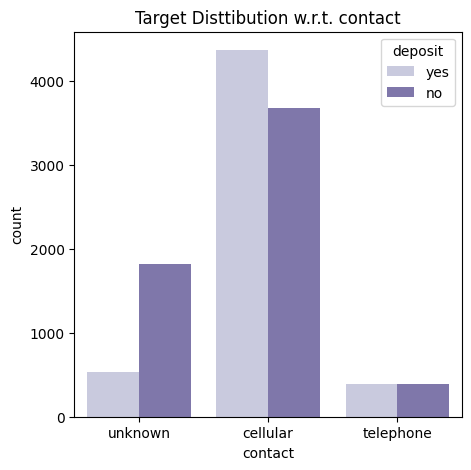

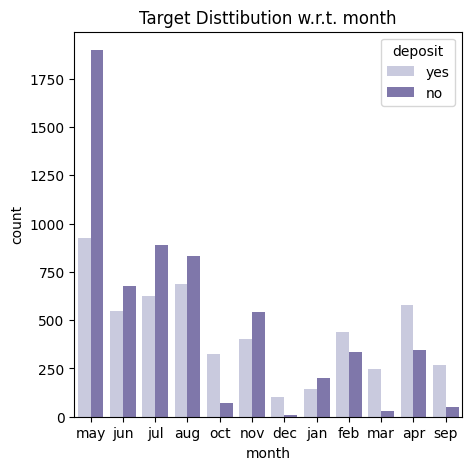

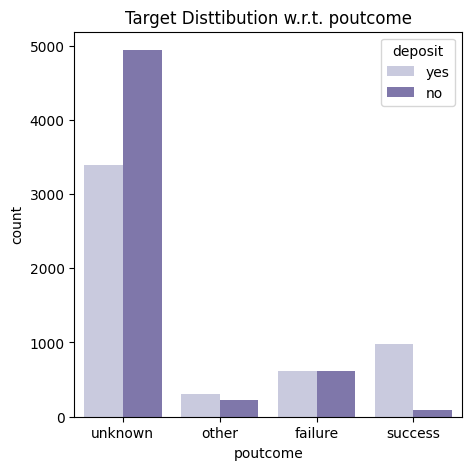

<Figure size 640x480 with 0 Axes>

In [10]:
for feature in categorical_features:
    if feature == "job":
        plt.figure(figsize=(20, 10))
    else:
        plt.figure(figsize=(5,5) )
    sns.countplot(data=X, x=feature, hue=y, palette="Purples")
    plt.title(f"Target Disttibution w.r.t. {feature}")
    plt.show()

plt.tight_layout()
    

**1.4: Explain the distribution of the target variable and the dataset.**


For some of the features, the target variables are imbalanced eg, unknown, success for poutcome, may for month and likewise.

**1.5: Split the data into development and test datasets. Which splitting methodology did you choose and why?**

**Hint: Based on the distribution of the data, try to use the best splitting strategy.**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f'Train data: {X_train.shape, y_train.shape}')
print(f'Test data: {X_test.shape, y_test.shape}')

Train data: ((8929, 16), (8929,))
Test data: ((2233, 16), (2233,))


> Stratified sampling should be used in this scenario since some of the features are imbalanced wrt to the target variable

**1.6: Would you drop any column? Justify your reasoning.**

**Preprocess the data (Handle the Categorical Variable). Would you consider a mix of encoding techniques? Justify.
Do we need to apply scaling? Briefly Justify**



> A mix of encoding techniques have been used to handle the categorical features. Ordinal for 'month' since months are ordered. Label encoding for features having non-ordered categorical data. One hot encoding increases dimensionality of the dataset and not the best for tree based searches

In [12]:
!pip install category_encoders

In [13]:
cat_features = ['poutcome', 'job', 'contact', 'education', 'marital', 'housing', 'default', 'loan']
ord_features = ['month']

month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

label_encoders = {col: LabelEncoder() for col in cat_features} # one for each column, do that there is no data leakage

X_train_label_encoded = X_train.copy()
X_test_label_encoded = X_test.copy()

for col in cat_features:
    X_train_label_encoded[col] = label_encoders[col].fit_transform(X_train[col])
    X_test_label_encoded[col] = label_encoders[col].transform(X_test[col])

preprocessor = ColumnTransformer(
    transformers=[
        ('ord_enc', OrdinalEncoder(categories=[month_order]), ord_features)  # Ordinal encoding for 'month'
    ],
    remainder='passthrough'  # Keep numerical features as is
)

X_train_transformed = preprocessor.fit_transform(X_train_label_encoded)
X_test_transformed = preprocessor.transform(X_test_label_encoded)

final_columns = ord_features + cat_features + numerical_features 
X_train_transformed = pd.DataFrame(X_train_transformed, columns=final_columns)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=final_columns)

print(f"Shape of transformed X_train: {X_train_transformed.shape}")
print(f"Shape of transformed X_test: {X_test_transformed.shape}")


Shape of transformed X_train: (8929, 16)
Shape of transformed X_test: (2233, 16)


In [14]:
X_train_transformed

,month,poutcome,job,contact,education,marital,housing,default,loan,age,balance,day,duration,campaign,pdays,previous
0,6.0,46.0,0.0,1.0,1.0,0.0,526.0,0.0,1.0,0.0,31.0,251.0,3.0,-1.0,0.0,3.0
1,8.0,46.0,0.0,1.0,2.0,0.0,2552.0,0.0,0.0,0.0,3.0,260.0,1.0,94.0,8.0,2.0
2,0.0,25.0,9.0,2.0,1.0,0.0,139.0,0.0,1.0,0.0,11.0,202.0,1.0,91.0,1.0,2.0
3,10.0,43.0,9.0,1.0,1.0,0.0,3288.0,1.0,0.0,0.0,21.0,775.0,3.0,-1.0,0.0,3.0
4,8.0,37.0,1.0,2.0,3.0,0.0,217.0,0.0,0.0,0.0,23.0,272.0,2.0,-1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8924,6.0,34.0,10.0,2.0,2.0,0.0,1974.0,0.0,0.0,0.0,22.0,355.0,1.0,342.0,3.0,2.0
8925,4.0,42.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,12.0,118.0,1.0,-1.0,0.0,3.0
8926,5.0,55.0,0.0,1.0,1.0,0.0,8304.0,0.0,0.0,0.0,1.0,201.0,1.0,-1.0,0.0,3.0
8927,3.0,53.0,0.0,1.0,1.0,0.0,459.0,0.0,0.0,0.0,5.0,558.0,1.0,-1.0,0.0,3.0


> Since the nature of the features is different, I have considered different encoding.

#### Now we need to find correlation between features and drop one of highly correlated features.

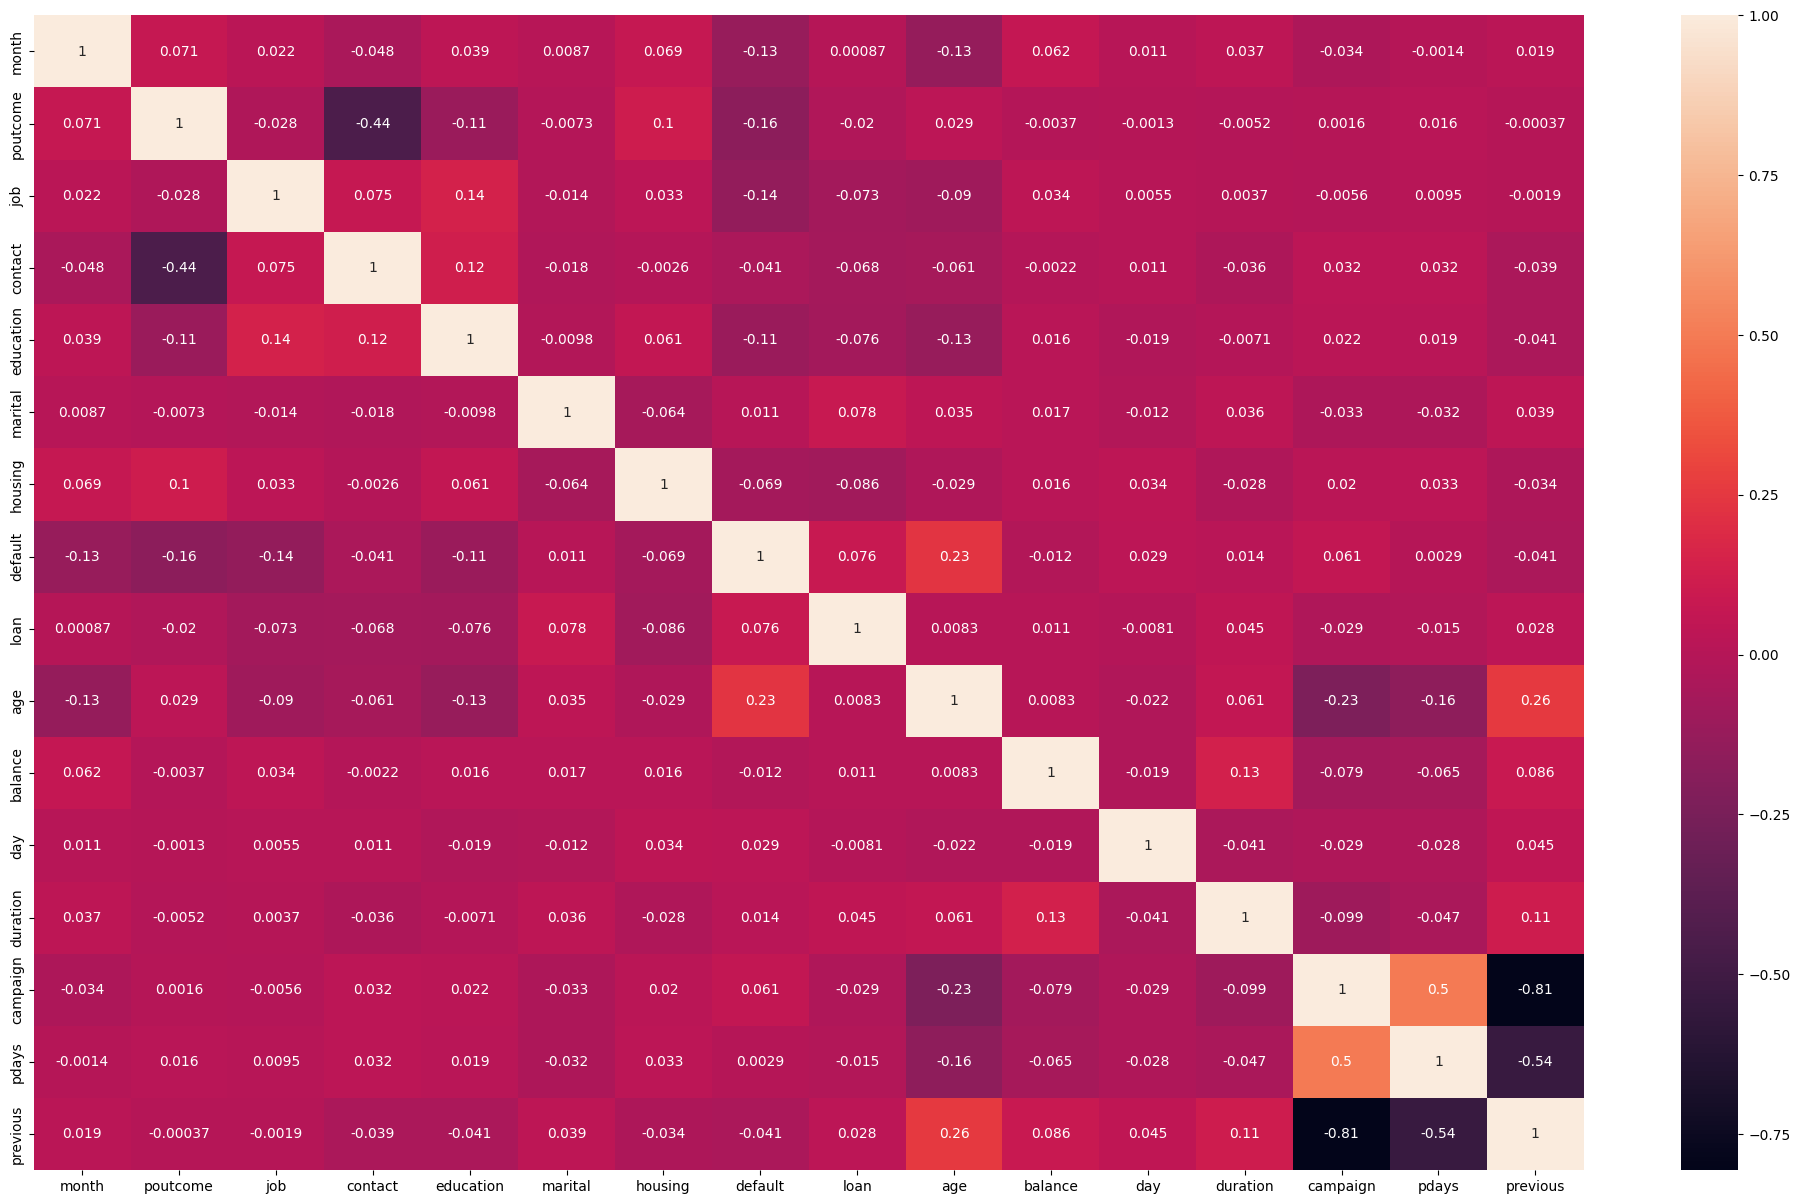

In [15]:
corr_matrix = X_train_transformed.corr()
fig = plt.figure(figsize=(25,15))
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [16]:
# Find pairs of highly correlated features
high_corr_pairs = corr_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)

# Filter out diagonal values (self-correlation) and pick those above the threshold (e.g., 0.8)
high_corr_pairs = high_corr_pairs[high_corr_pairs < 1].reset_index()  # remove self-correlation
high_corr_pairs = high_corr_pairs[high_corr_pairs[0] > 0.9]

print("Highly Correlated Features:")
print(high_corr_pairs)

high_corr_pairs['sorted_pairs'] = high_corr_pairs.apply(lambda x: tuple(sorted([x['level_0'], x['level_1']])), axis=1)

high_corr_pairs_no_duplicates = high_corr_pairs.drop_duplicates(subset='sorted_pairs').drop(columns='sorted_pairs')

print("Highly Correlated Feature Pairs Without Duplicates:")
print(high_corr_pairs_no_duplicates)



Highly Correlated Features:
Empty DataFrame
Columns: [level_0, level_1, 0]
Index: []
Highly Correlated Feature Pairs Without Duplicates:
Empty DataFrame
Columns: [level_0, level_1, 0]
Index: []


#### We will drop highly correlated features having correlation > 0.9 threshold. 

Over here, we have no feature who are highly correlated > 0.9, hence we do not drop any.

#### Decision Trees are Invariant to Scale, so we do not using Standard Scaler

**1.7: Fit a Decision Tree on the development data until all leaves are pure. Which scoring metric will you prefer, and why? What is the performance of the tree on the development set and test set? Evaluate test and train accuarcy on F-1 score and accuracy.**

In [55]:
# Imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

# Since we train till all leaves are pure, we do not have any early stop conditions.
tree = DecisionTreeClassifier(random_state=42)

tree.fit(X_train_transformed, y_train)

y_train_pred = tree.predict(X_train_transformed)
y_test_pred = tree.predict(X_test_transformed)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred, average='weighted')  # Use 'weighted' for imbalanced data
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Train F1-score: {train_f1:.4f}")
print(f"Test F1-score: {test_f1:.4f}")

Train Accuracy: 1.0000
Test Accuracy: 0.7837
Train F1-score: 1.0000
Test F1-score: 0.7835


**1.8: Visualize the trained tree until the suitable max_depth.**

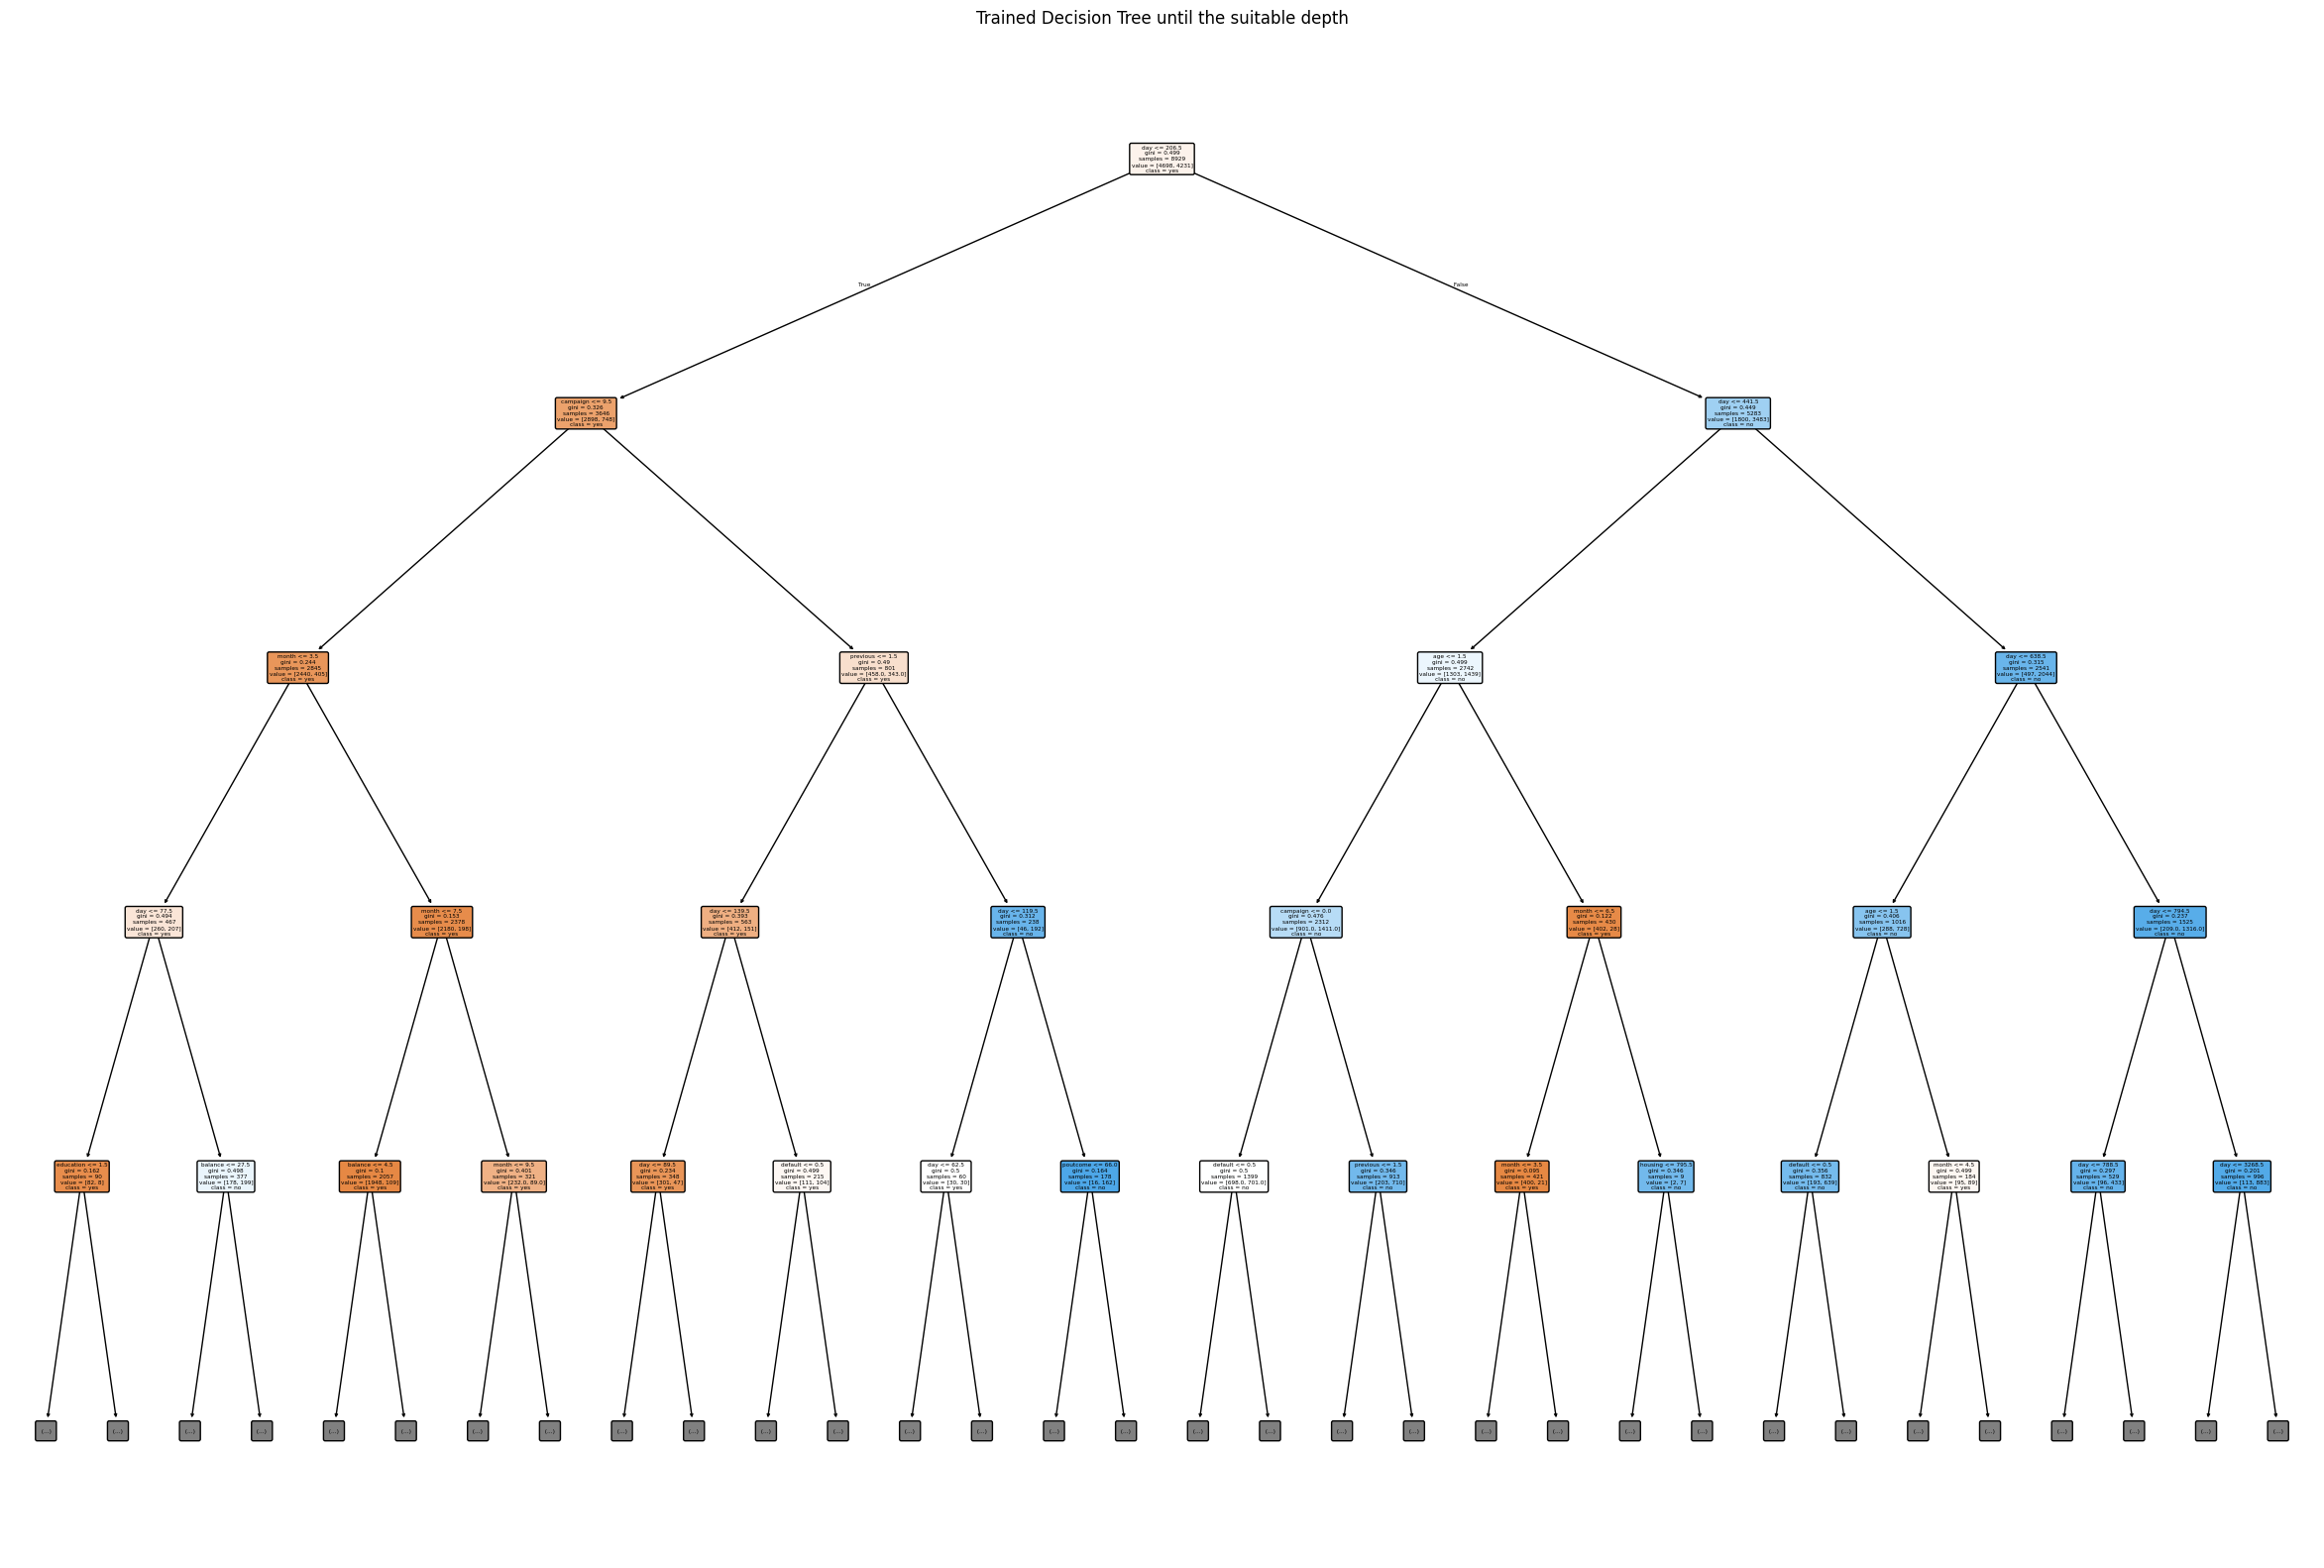

In [56]:
from sklearn.tree import plot_tree

# Visualize the tree
plt.figure(figsize=(30, 20))  # Adjust figure size based on tree complexity
plot_tree(tree, filled=True, feature_names=final_columns, class_names=['yes', 'no'], rounded=True, max_depth=4)
plt.title('Trained Decision Tree until the suitable depth')
plt.show()



**1.9: Prune the tree using one of the techniques discussed in class and evaluate the performance.**

**Print the optimal value of the tuned parameter.**

There are two pruning that have been discussed in class
- Reduced Error
- Cost Complexity

I will be implementing **cost complexity pruning**

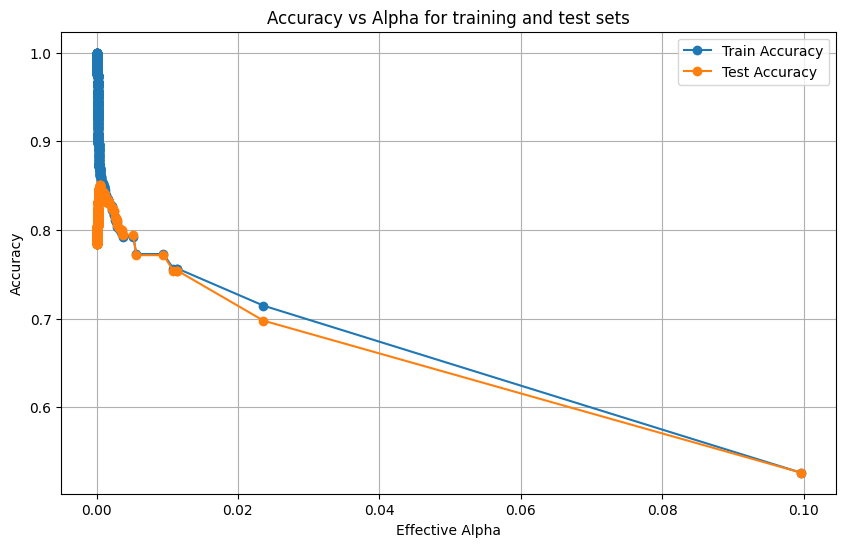

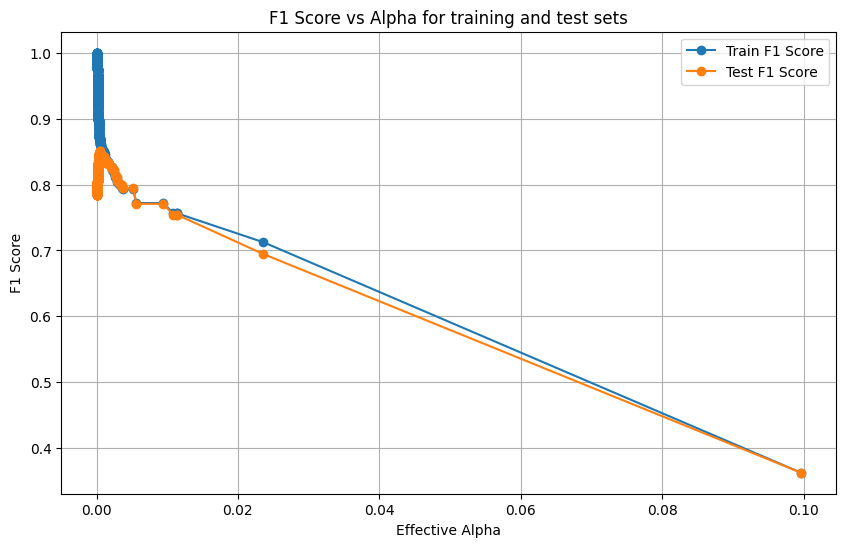

Optimal Alpha: 0.0005
Pruned Tree Train Accuracy: 0.8664
Pruned Tree Test Accuracy: 0.8504
Pruned Tree Train F1 Score: 0.8664
Pruned Tree Test F1 Score: 0.8505

Best alpha (for pruning): 0.00047259504437559925


In [57]:
# Find the cost path
path = tree.cost_complexity_pruning_path(X_train_transformed, y_train)
ccp_alphas = path.ccp_alphas  # Effective alphas
impurities = path.impurities  # Corresponding total leaf impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train_transformed, y_train)
    clfs.append(clf)

train_accuracies = []
test_accuracies = []
train_f1_scores = []
test_f1_scores = []

for clf in clfs:
    y_train_pred = clf.predict(X_train_transformed)
    y_test_pred = clf.predict(X_test_transformed)

    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

    train_f1_scores.append(f1_score(y_train, y_train_pred, average='weighted'))
    test_f1_scores.append(f1_score(y_test, y_test_pred, average='weighted'))

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(ccp_alphas, test_accuracies, marker='o', label='Test Accuracy')
plt.xlabel('Effective Alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Alpha for training and test sets')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_f1_scores, marker='o', label='Train F1 Score')
plt.plot(ccp_alphas, test_f1_scores, marker='o', label='Test F1 Score')
plt.xlabel('Effective Alpha')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Alpha for training and test sets')
plt.legend()
plt.grid()
plt.show()

# Find the best alpha (where test f1_score is highest)
best_alpha_index = test_f1_scores.index(max(test_f1_scores))
best_alpha = ccp_alphas[best_alpha_index]

pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
pruned_tree.fit(X_train_transformed, y_train)

# Final model performance on train and test sets
y_train_pred_pruned = pruned_tree.predict(X_train_transformed)
y_test_pred_pruned = pruned_tree.predict(X_test_transformed)

train_accuracy_pruned = accuracy_score(y_train, y_train_pred_pruned)
test_accuracy_pruned = accuracy_score(y_test, y_test_pred_pruned)

train_f1_pruned = f1_score(y_train, y_train_pred_pruned, average='weighted')
test_f1_pruned = f1_score(y_test, y_test_pred_pruned, average='weighted')

print(f"Optimal Alpha: {best_alpha:.4f}")
print(f"Pruned Tree Train Accuracy: {train_accuracy_pruned:.4f}")
print(f"Pruned Tree Test Accuracy: {test_accuracy_pruned:.4f}")
print(f"Pruned Tree Train F1 Score: {train_f1_pruned:.4f}")
print(f"Pruned Tree Test F1 Score: {test_f1_pruned:.4f}")

print(f"\nBest alpha (for pruning): {best_alpha}")

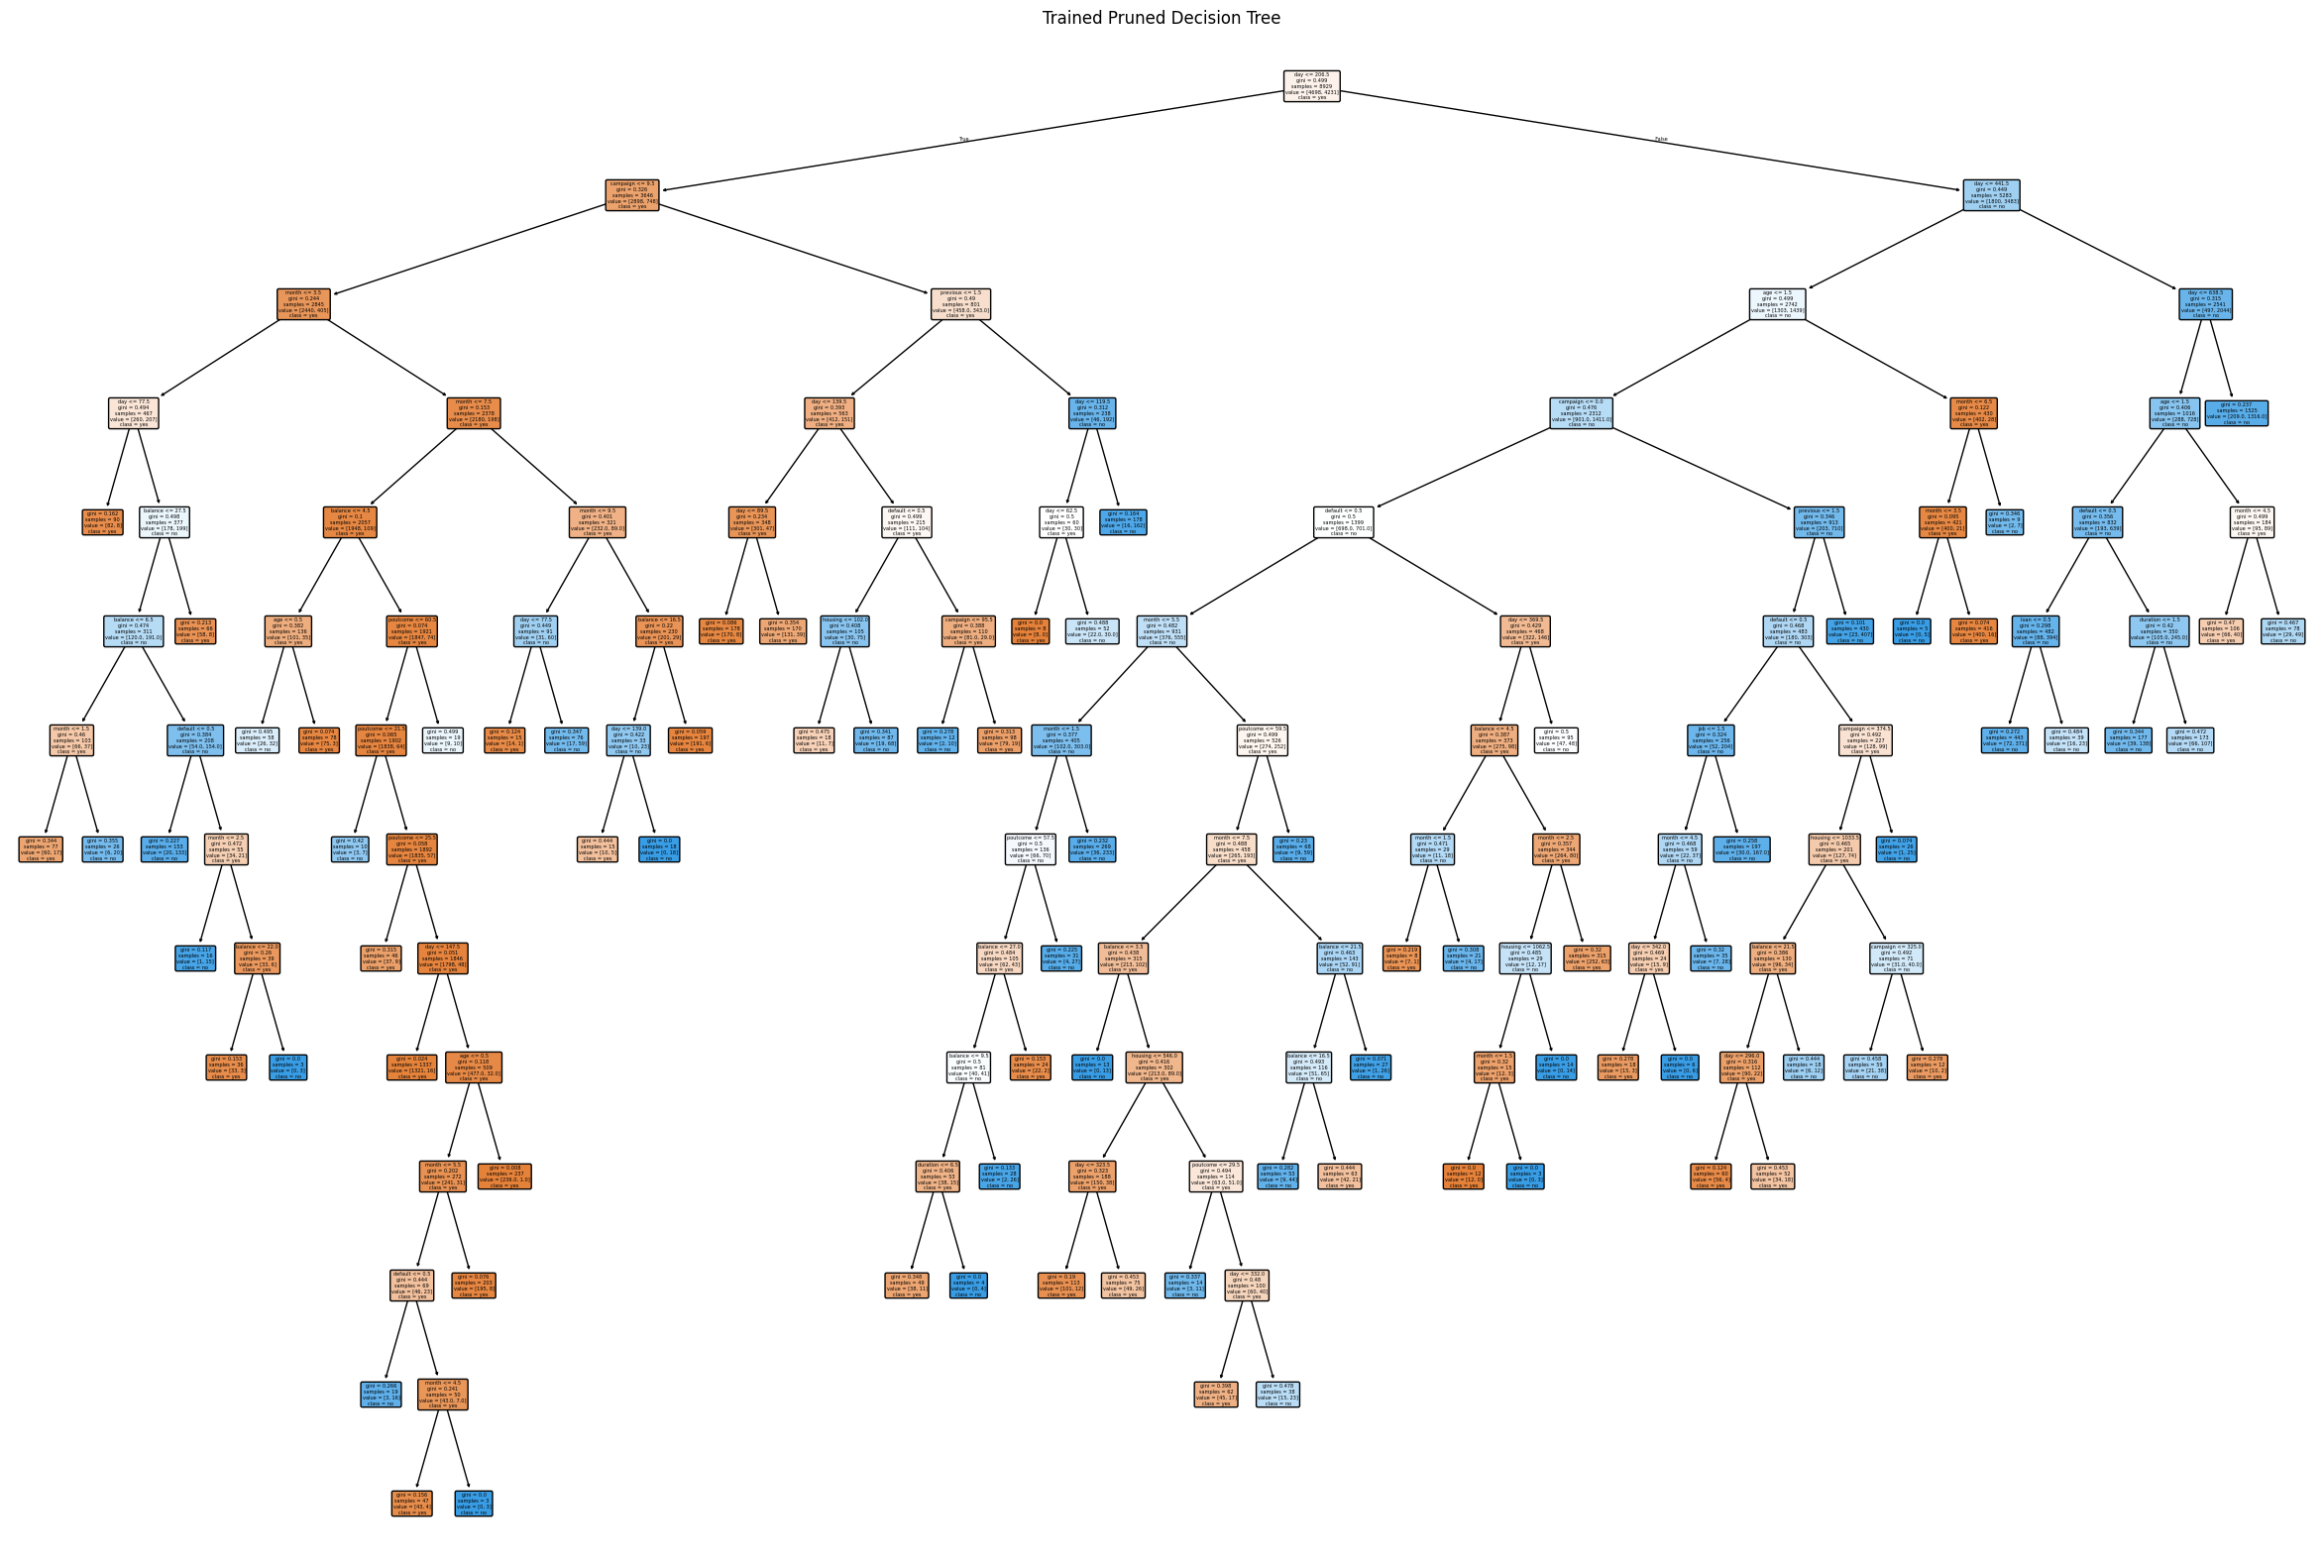

In [30]:
# Visualize the pruned tree

plt.figure(figsize=(30, 20))  # Adjust figure size based on tree complexity
plot_tree(pruned_tree, filled=True, feature_names=final_columns, class_names=['yes', 'no'], rounded=True)
plt.title('Trained Pruned Decision Tree')
plt.show()


**1.10: List the top 3 most important features for this trained tree? How would you justify these features being the most important?**

In [58]:
# List of feature importances
feature_importances = pruned_tree.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': final_columns, 
    'Importance': feature_importances
})

# Sort by importance and list the top 3 features
top_3_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(3)
print(top_3_features)


   Feature  Importance
11     day    0.481800
0    month    0.125260
9      age    0.099615


The three important features are :
- day
- month
- age

'day' and 'month' represent the last day of contact which can affect whether the client will end up taking the term deposit. 'age' also determines how likely a person is to take term deposit after the campaign.

Hence in my opinion, they are pretty important features.

## Question 2: Random Forests

**2.1: Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Use accuracy and F1 score to evaluate. Does this perform better than Decision Tree on the test dataset (compare to results in Q 1.7)?**

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train_transformed, y_train)

y_train_rf_pred = rf_model.predict(X_train_transformed)
y_test_rf_pred = rf_model.predict(X_test_transformed)

train_rf_accuracy = accuracy_score(y_train, y_train_rf_pred)
test_rf_accuracy = accuracy_score(y_test, y_test_rf_pred)

train_rf_f1 = f1_score(y_train, y_train_rf_pred, average='weighted')  # Use 'weighted' for imbalanced data
test_rf_f1 = f1_score(y_test, y_test_rf_pred, average='weighted')

print(f"Random Forest Train Accuracy: {train_rf_accuracy:.4f}")
print(f"Random Forest Test Accuracy: {test_rf_accuracy:.4f}")
print(f"Random Forest Train F1 Score: {train_rf_f1:.4f}")
print(f"Random Forest Test F1 Score: {test_rf_f1:.4f}")

# Compare the performance of Random Forest and Decision Tree
print("\nComparison with Decision Tree Performance:")

# Print Decision Tree Performance (from previous implementation)
print(f"Decision Tree Test Accuracy: {test_accuracy:.4f}")  # From previous Decision Tree pruning
print(f"Decision Tree Test F1 Score: {test_f1:.4f}")


# Print Decision Tree Performance (from previous implementation)
print(f"Pruned Decision Tree Test Accuracy: {test_accuracy_pruned:.4f}")  # From previous Decision Tree pruning
print(f"Pruned Decision Tree Test F1 Score: {test_f1_pruned:.4f}")


Random Forest Train Accuracy: 1.0000
Random Forest Test Accuracy: 0.8558
Random Forest Train F1 Score: 1.0000
Random Forest Test F1 Score: 0.8559

Comparison with Decision Tree Performance:
Decision Tree Test Accuracy: 0.7837
Decision Tree Test F1 Score: 0.7835
Pruned Decision Tree Test Accuracy: 0.8504
Pruned Decision Tree Test F1 Score: 0.8505


Random Forest works similar to Pruned Decision Tree but works much better than default Decision Tree (as is visible from F1 and accuracy scores )

**2.2: Do all trees in the trained random forest model have pure leaves? How would you verify that all trees have pure leaves? Print the score (mean accuracy) values of your choosen method**

In [34]:

all_pure = True  # Flag to check if all trees have pure leaves
impure_tree_count = 0  

for idx, tree in enumerate(rf_model.estimators_):
    impurities = tree.tree_.impurity
    
    is_leaf = np.where((tree.tree_.children_left == -1) & (tree.tree_.children_right == -1))[0]
    
    impure_leaves = np.sum(impurities[is_leaf] > 0)
    print(impure_leaves)
    
    if impure_leaves > 0:
        all_pure = False
        impure_tree_count += 1

    print(f"Tree {idx + 1}: Number of impure leaves: {impure_leaves}")

if all_pure:
    print("All trees in the Random Forest have pure leaves.")
else:
    print(f"{impure_tree_count} out of {len(rf_model.estimators_)} trees have impure leaves.")

test_rf_accuracy = rf_model.score(X_test_transformed, y_test)
print(f"\nRandom Forest Test Mean Accuracy: {test_rf_accuracy:.4f}")


0
Tree 1: Number of impure leaves: 0
0
Tree 2: Number of impure leaves: 0
0
Tree 3: Number of impure leaves: 0
0
Tree 4: Number of impure leaves: 0
0
Tree 5: Number of impure leaves: 0
0
Tree 6: Number of impure leaves: 0
0
Tree 7: Number of impure leaves: 0
0
Tree 8: Number of impure leaves: 0
0
Tree 9: Number of impure leaves: 0
0
Tree 10: Number of impure leaves: 0
0
Tree 11: Number of impure leaves: 0
0
Tree 12: Number of impure leaves: 0
0
Tree 13: Number of impure leaves: 0
0
Tree 14: Number of impure leaves: 0
0
Tree 15: Number of impure leaves: 0
0
Tree 16: Number of impure leaves: 0
0
Tree 17: Number of impure leaves: 0
0
Tree 18: Number of impure leaves: 0
0
Tree 19: Number of impure leaves: 0
0
Tree 20: Number of impure leaves: 0
0
Tree 21: Number of impure leaves: 0
0
Tree 22: Number of impure leaves: 0
0
Tree 23: Number of impure leaves: 0
0
Tree 24: Number of impure leaves: 0
0
Tree 25: Number of impure leaves: 0
0
Tree 26: Number of impure leaves: 0
0
Tree 27: Number of 

**2.3: Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?**


The three hyperparamters that were mentioned in class were :

    - n_estimators

    - oob_score
    
    - warm_start

We can also have max_depth as a hyperparameter. 

I would choose n_estimators because too many trees can lead to overfitting and too less can lead to underfitting. 

I would also choose max_depth because the shallowness of a tree can help decide whether the tree is overfitting or underfitting. 

I am not choosing oob_score since we have enough training data to split into train and test and we can use that for verification.

**2.4: Now, assume you had to choose up to 5 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift?**

For both of the hyperparameters, I will start with a smaller value and increment it to the brink of overfitting. This will give us the range of hyperparameter from underfitting to overfitting.

For **n_estimators**, the default value is 100. I will go below it and above it to check underfitting and overfitting.

*Vals: 40, 80, 100, 200, 500*

My assumption is that 40 might underfit and 500 might overfit.

For **max_depth**, the default value is None. That is where most likely the model overfits. So, I will start from a very shallow tree and increase depth till None.

*Vals: 5, 10, 15, 20, None*




**2.5: Perform model selection using the chosen values for the hyperparameters. Use out-of-bag (OOB) error for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on train and test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q2.1?**

In [36]:
param_grid = {
    'n_estimators': [40, 80, 100, 200, 500],
    'max_depth': [5, 10, 15, 20, None]
}

best_oob_score = 0
best_params = {}

# Iterate through each combination of hyperparameters in the grid
for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        
        # Initialize RandomForest with the current set of hyperparameters and oob_score=True
        rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, oob_score=True, random_state=42)
        rf.fit(X_train_transformed, y_train)
        oob_score = rf.oob_score_
        
        print(f"n_estimators: {n_estimators}, max_depth: {max_depth}, OOB Score: {oob_score:.4f}")

        # Update the best result
        if oob_score > best_oob_score:
            best_oob_score = oob_score
            best_params = {'n_estimators': n_estimators, 'max_depth': max_depth}
            
print(f"Best OOB Score: {best_oob_score:.4f} with parameters: {best_params}")     

n_estimators: 40, max_depth: 5, OOB Score: 0.8163
n_estimators: 40, max_depth: 10, OOB Score: 0.8388
n_estimators: 40, max_depth: 15, OOB Score: 0.8401
n_estimators: 40, max_depth: 20, OOB Score: 0.8425
n_estimators: 40, max_depth: None, OOB Score: 0.8400
n_estimators: 80, max_depth: 5, OOB Score: 0.8179
n_estimators: 80, max_depth: 10, OOB Score: 0.8430
n_estimators: 80, max_depth: 15, OOB Score: 0.8459
n_estimators: 80, max_depth: 20, OOB Score: 0.8475
n_estimators: 80, max_depth: None, OOB Score: 0.8495
n_estimators: 100, max_depth: 5, OOB Score: 0.8172
n_estimators: 100, max_depth: 10, OOB Score: 0.8423
n_estimators: 100, max_depth: 15, OOB Score: 0.8474
n_estimators: 100, max_depth: 20, OOB Score: 0.8481
n_estimators: 100, max_depth: None, OOB Score: 0.8470
n_estimators: 200, max_depth: 5, OOB Score: 0.8151
n_estimators: 200, max_depth: 10, OOB Score: 0.8437
n_estimators: 200, max_depth: 15, OOB Score: 0.8503
n_estimators: 200, max_depth: 20, OOB Score: 0.8487
n_estimators: 200, m

In [38]:
optimal_rf = RandomForestClassifier(**best_params, oob_score=True, random_state=42)
optimal_rf.fit(X_train_transformed, y_train)

# Evaluate the optimal model on train and test sets
y_train_pred = optimal_rf.predict(X_train_transformed)
y_test_pred = optimal_rf.predict(X_test_transformed)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"Optimal Model Train Accuracy: {train_accuracy:.4f}")
print(f"Optimal Model Test Accuracy: {test_accuracy:.4f}")
print(f"Optimal Model Train F1-score: {train_f1:.4f}")
print(f"Optimal Model Test F1-score: {test_f1:.4f}")

# Check the OOB score for the optimal model
print(f"OOB Score for the optimal model: {optimal_rf.oob_score_:.4f}")


Optimal Model Train Accuracy: 0.9840
Optimal Model Test Accuracy: 0.8571
Optimal Model Train F1-score: 0.9840
Optimal Model Test F1-score: 0.8572
OOB Score for the optimal model: 0.8521


#### The F1 and Accuracy scores of the optimal model are only marginally better than the vanilla RF model.

 **2.6: Can you find the top 3 most important features from the model trained in Q2.5? How do these features compare to the important features that you found from Q1.10? If they differ, which feature set makes more sense?**

In [42]:
feature_importances = optimal_rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': final_columns, 
    'Importance': feature_importances
})


# Sort by importance and list the top 3 features
top_3_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(3)
print(top_3_features)

    Feature  Importance
11      day    0.389480
0     month    0.084272
6   housing    0.077838


In Decision Tree, the top three important features were: 

- day
- month
- age

In RF, the top three important features are:
- day
- month
- housing

Apart from day and month which remains important features, for RF, housing is important and for Decision Trees, age is more important for decision making. 
'housing' shows whether a person has housing loan. Having a housing loan is a financial burden and a person having a housing loan might not opt for term deposit. So it makes sense that it is one of the top 3 important features in RF model.

In my opinion, both of them are pretty good feature sets. Which one is better depends on whether age is a bigger factor in the risk accumen or the having a housing loan. This requries more analysis through domain knowledge.

## Question 3: Gradient Boosted Trees

**3.1: Choose three hyperparameters to tune HistGradientBoostingClassifier on the development dataset using 5-fold cross validation. For each hyperparmeter, give it 3 potential values. Report on the time taken to do model selection for the model. Also, report the performance of the test dataset from the optimal models.**

In [44]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import make_scorer, f1_score

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

hgbc = HistGradientBoostingClassifier(random_state=42)

f1_scorer = make_scorer(f1_score, pos_label='yes')

# Start timing
start_time = time.time()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=hgbc, param_grid=param_grid, cv=5, scoring=f1_scorer)
grid_search.fit(X_train_transformed, y_train)

# End timing
end_time = time.time()
time_taken = end_time - start_time

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Optimal Hyperparameters: {best_params}")
print(f"Best Cross-Validation Score (F1): {best_score:.4f}")
print(f"Time taken for model selection: {time_taken:.2f} seconds")


Optimal Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'max_iter': 100}
Best Cross-Validation Score (F1): 0.8574
Time taken for model selection: 51.26 seconds


In [45]:
# Train using the optimal hyperparameters
optimal_model_hgbc = grid_search.best_estimator_
test_pred_hgbc = optimal_model_hgbc.predict(X_test_transformed)

test_accuracy_hgbc = accuracy_score(y_test, test_pred_hgbc)
test_f1_hgbc = f1_score(y_test, test_pred_hgbc, average='weighted')

print(f"Test Accuracy using optimal hyper-paramaters for HistGradientBootingClassifier: {test_accuracy_hgbc:.4f}")
print(f"Test F1 Score using optimal hyper-paramaters for HistGradientBootingClassifier: {test_f1_hgbc:.4f}")

Test Accuracy using optimal hyper-paramaters for HistGradientBootingClassifier: 0.8670
Test F1 Score using optimal hyper-paramaters for HistGradientBootingClassifier: 0.8671


#### This performs better than hypertuned Random Forest.

**3.2: Repeat 3.1 for XGBoost.**

**Note**: For XGBoost, you **DO NOT HAVE TO** choose the same hyperparameters as HistGradientBoostingClassifier.

In [46]:
!pip install xgboost

In [47]:
import xgboost as xgb

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],        
    'n_estimators': [100, 200, 300],          
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss',)

# Start timing
start_time = time.time()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_transformed, y_train_encoded)

# End timing
end_time = time.time()
time_taken = end_time - start_time

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Optimal Hyperparameters: {best_params}")
print(f"Best Cross-Validation Score (F1): {best_score:.4f}")
print(f"Time taken for model selection: {time_taken:.2f} seconds")

Optimal Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'n_estimators': 200}
Best Cross-Validation Score (F1): 0.8571
Time taken for model selection: 28.48 seconds


In [49]:
# Evaluate the optimal model on the test dataset
optimal_model_xgb = grid_search.best_estimator_
test_f1_xgb= f1_score(y_test_encoded, optimal_model_xgb.predict(X_test_transformed))
test_accuracy_xgb = accuracy_score(y_test_encoded, optimal_model_xgb.predict(X_test_transformed))
print(f"Test F1 Score using optimal hyper-paramaters for XGBoost: {test_f1_xgb:.4f}")
print(f"Test Accuracy Score using optimal hyper-paramaters for XGBoost: {test_accuracy_xgb:.4f}")


Test F1 Score using optimal hyper-paramaters for XGBoost: 0.8598
Test Accuracy Score using optimal hyper-paramaters for XGBoost: 0.8630


**3.3: Compare the results on the test dataset of XGBoost and HistGradientBoostingClassifier. Which model do you prefer and why?**

|            | XGBoost | HistGradientBoostingClassifier|
|------------|---------|-------------------------------|
| Accuracy   | 0.8630  | 0.8670                        |
| F1-Score   | 0.8598  | 0.8671                        |

The accuracy and F1-Score XGBoost is slightly lesser than HistGradientBoostingClassifier. 

**I would prefer XGBoost however since the time taken for model selection is way lesser.**


**3.4: Can you list the top 3 important features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree?**

In [50]:
feature_importances = optimal_model_xgb.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': final_columns, 
    'Importance': feature_importances
})

# Sort by importance and list the top 3 features
top_3_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(3)
print(top_3_features)

    Feature  Importance
9       age    0.168653
11      day    0.149816
7   default    0.126599



|               | Feature 1       | Feature 2| Feature 3|
|---------------|-----------------|------------|----------|
| XGBoost       | age             | day| default                        |
| Random Forest | day        | month| housing |
| Decision Trees| day| month | age |

In XGBoost, 'age', 'day' and 'default' provide more diverse information about the dataset and hence are a better feature set than the ones in RF and decision trees.

**3.5: Can you choose the top 5 features (as given by feature importances from XGBoost) and repeat Q3.2? Does this model perform better than the one trained in Q3.2? Why or why not is the performance better?**

In [52]:
top_5_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(5)['Feature'].tolist()

X_train_top5 = X_train_transformed[top_5_features]
X_test_top5 = X_test_transformed[top_5_features]



In [53]:
X_test_top5

,age,day,default,previous,month
0,0.0,458.0,0.0,3.0,0.0
1,0.0,479.0,0.0,3.0,7.0
2,0.0,99.0,0.0,0.0,9.0
3,2.0,268.0,1.0,3.0,4.0
4,0.0,808.0,0.0,3.0,6.0
...,...,...,...,...,...
2228,0.0,302.0,1.0,3.0,4.0
2229,0.0,310.0,0.0,3.0,5.0
2230,1.0,350.0,0.0,3.0,3.0
2231,0.0,590.0,1.0,1.0,4.0


In [54]:
xgb_model_top5 = xgb.XGBClassifier(random_state=42)
xgb_model_top5.fit(X_train_top5, y_train_encoded)

# Predict
y_train_pred_top5 = xgb_model_top5.predict(X_train_top5)
y_test_pred_top5 = xgb_model_top5.predict(X_test_top5)

# Evaluate
train_accuracy_top5 = accuracy_score(y_train_encoded, y_train_pred_top5)
test_accuracy_top5 = accuracy_score(y_test_encoded, y_test_pred_top5)
train_f1_top5 = f1_score(y_train_encoded, y_train_pred_top5, average='weighted')
test_f1_top5 = f1_score(y_test_encoded, y_test_pred_top5, average='weighted')

print(f"Train Accuracy (Top 5 Features) XGBoost: {train_accuracy_top5:.4f}")
print(f"Test Accuracy (Top 5 Features) XGBoost: {test_accuracy_top5:.4f}")
print(f"Train F1-score (Top 5 Features) XGBoost: {train_f1_top5:.4f}")
print(f"Test F1-score (Top 5 Features) XGBoost: {test_f1_top5:.4f}")

Train Accuracy (Top 5 Features) XGBoost: 0.8784
Test Accuracy (Top 5 Features) XGBoost: 0.8464
Train F1-score (Top 5 Features) XGBoost: 0.8785
Test F1-score (Top 5 Features) XGBoost: 0.8465


The top 5 feature model performed worse because only the top 5 features could not capture all the complexity of the full dataset. There are related features which do not appear in top 5. When they are included with other features however, they are important in the decision making process. 

## Question 4 was dropped for the assignment.